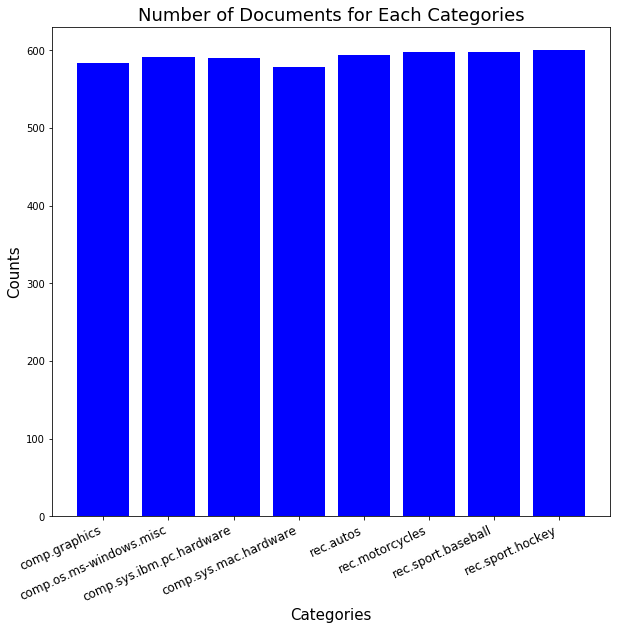

[584, 591, 590, 578, 594, 598, 597, 600]


In [6]:
############ Part A ############

from sklearn.datasets import fetch_20newsgroups
import numpy as np
import matplotlib.pyplot as plt

categories = ['comp.graphics', 'comp.os.ms-windows.misc', 
              'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
                'rec.autos', 'rec.motorcycles', 'rec.sport.baseball',
                'rec.sport.hockey']

# loading data with certain categories defined above
training_data = fetch_20newsgroups(subset='train', categories=categories, 
                                   shuffle=True, random_state=42)

# each categories correspond to a number in target, count the number of 
# appearences 
counts = [sum(training_data['target'] == i) for i in range(8)]

#plot the figure
line = [0, 1]
plt.figure(figsize=(10,10))
plt.bar(range(8), counts,alpha = 1, color = 'b') 
plt.xticks(range(8), categories,size='large', rotation=25, ha ='right')

plt.gcf().subplots_adjust(bottom=0.20)
plt.ylabel('Counts',fontsize = 15)
plt.xlabel('Categories', fontsize = 15)
plt.title('Number of Documents for Each Categories',fontsize = 18)
plt.show()
# print the number of each categories to check
print counts


In [7]:
############ Part B ############

# an example to show that without stem, the reusult is not satsified
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer(min_df= 1)
train_counts = count_vectorizer.fit_transform(training_data.data) 
train_counts.shape
print count_vectorizer.get_feature_names()[1:10]
print count_vectorizer.get_feature_names()[20:70]

[u'000', u'0000', u'00000', u'0000000004', u'0000000005', u'0000000667', u'0000001200', u'000005102000', u'000042']
[u'000601', u'0007', u'000710', u'00072', u'000851', u'0009', u'000ds', u'000mi', u'000miles', u'000rpm', u'000th', u'000usd', u'001', u'0010', u'00100111b', u'0010580b', u'0011', u'001127', u'001200201pixel', u'001211', u'0013', u'001323', u'001813', u'001934', u'00196', u'002', u'002142', u'0022', u'002222', u'002251w', u'0023', u'002651', u'0028', u'002937', u'002d', u'003', u'003015', u'003029', u'00309', u'00314', u'003221', u'003749', u'0038', u'0039', u'0044', u'0049', u'005', u'005117', u'005131', u'005245']


In [8]:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.stem import PorterStemmer
import string
import re

stemmer = PorterStemmer()
def stem_tokens(tokens, stemmer):
    stemmed = []
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed

def tokenize(txt):
    tokens = re.findall('(?u)\\b\\w\\w+\\b',re.sub('[0-9]|[^\w\s]|_','',txt.lower()))
    tokens_wo_stop = [item for item in tokens if item not in text.ENGLISH_STOP_WORDS]
    stems = stem_tokens(tokens_wo_stop, stemmer)
    return stems
    
#min_df = 2
final_count_vectorizer_2 = CountVectorizer(min_df = 2, tokenizer=tokenize) 
final_train_counts_2 = final_count_vectorizer_2.fit_transform(training_data.data)
tfidf_transformer_2 = TfidfTransformer(sublinear_tf=True)
train_tfidf_2 = tfidf_transformer_2.fit_transform(final_train_counts_2)
print "For min_df = 2: " + str(train_tfidf_2.shape)

#min_df = 5
final_count_vectorizer_5 = CountVectorizer(min_df = 5, tokenizer=tokenize) 
final_train_counts_5 = final_count_vectorizer_5.fit_transform(training_data.data)
tfidf_transformer_5 = TfidfTransformer(sublinear_tf=True)
train_tfidf_5 = tfidf_transformer_5.fit_transform(final_train_counts_5)
print "For min_df = 5: " + str(train_tfidf_5.shape)

For min_df = 2: (4732, 18713)
For min_df = 5: (4732, 8030)


In [9]:
############ Part C ############

from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import SnowballStemmer

dt20 = fetch_20newsgroups(subset='train', shuffle=False, random_state=42)
docus = dt20.data
label = dt20.target
clss = ['']*20
for i in range(len(label)):
    clss[label[i]] += docus[i]

vectorizer = TfidfVectorizer(min_df = 2,tokenizer=tokenize,stop_words=text.ENGLISH_STOP_WORDS,smooth_idf = False)
tficf20 = vectorizer.fit_transform(clss)

voca = vectorizer.get_feature_names()

tficf_matrix = tficf20.toarray()
clss_index = [3,4,6,15]
for i,idx in enumerate (clss_index):
    arr = (-tficf_matrix[idx,:]).argsort()
    for j in range(10):
        print tficf_matrix[idx,arr[j]],voca[arr[j]]    
    print ' '

0.432286048349 scsi
0.293867386907 drive
0.229096307748 ide
0.197409386311 use
0.190819088134 line
0.185714829191 mb
0.183330112933 subject
0.175541578723 organ
0.143189205853 card
0.120722280248 control
 
0.250988400994 line
0.232328584229 mac
0.228276260414 subject
0.214033053609 organ
0.1996298907 quadra
0.184107729093 simm
0.183621882323 use
0.161679644812 appl
0.156238270422 scsi
0.147213103757 centri
 
0.311300516762 line
0.297916577347 subject
0.292352595224 sale
0.286515443772 organ
0.165068586118 univers
0.163085780278 new
0.140779214587 use
0.138300707288 offer
0.130369483931 nntppostinghost
0.125412469333 includ
 
0.343657781593 god
0.263724413989 christian
0.200741305877 jesu
0.164787639152 church
0.160078912482 subject
0.152633381669 peopl
0.147979924911 line
0.146583887883 say
0.145761263015 christ
0.136113610177 believ
 


In [10]:
############ Part D ############

# using LSI
from sklearn.decomposition import TruncatedSVD

SVD = TruncatedSVD(n_components=50, random_state=42, algorithm="arpack")
reduced_train_tfidf = SVD.fit_transform(train_tfidf_2)
print "TFxIDF matrix after LSI: " + str (reduced_train_tfidf.shape)

TFxIDF matrix after LSI: (4732, 50)


In [11]:
# using NMF
from sklearn.decomposition import NMF

trainNMF = NMF(n_components=50, init='random', random_state=42)
NMFed_train = trainNMF.fit_transform(train_tfidf_2)
print "TFxIDF matrix after NMF: " + str (NMFed_train.shape)

TFxIDF matrix after NMF: (4732, 50)


Hard Margin SVM Accuracy: 0.916507936508
--------------------------------------------------
Classification report: 
                       precision    recall  f1-score   support

  Computer technology       0.92      0.91      0.92      1590
Recreational activity       0.91      0.92      0.92      1560

          avg / total       0.92      0.92      0.92      3150

--------------------------------------------------
Confusion Matrix: 
[[1453  137]
 [ 126 1434]]
--------------------------------------------------


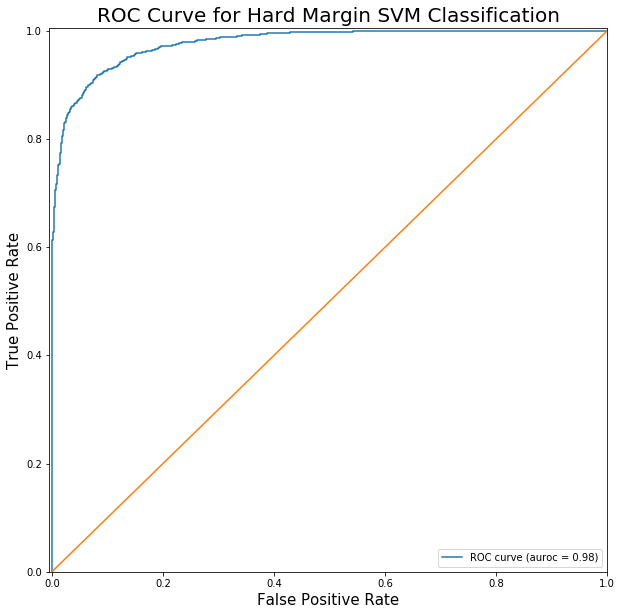

In [12]:
############ Part E ############

#### Hard Margin SVM ####
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

hard_classifier = svm.LinearSVC(C=1000, dual=False, random_state=42)
train_targets = [sum([kind == 0, kind == 1, kind == 2, kind == 3]) for kind in training_data['target']] 

hard_classifier.fit(reduced_train_tfidf, train_targets)
testing_data = fetch_20newsgroups(subset="test", categories=categories, shuffle=True, random_state=42)
test_counts = final_count_vectorizer_2.fit_transform(testing_data.data) # test trained CountVectorizer
test_tfidf = tfidf_transformer_2.fit_transform(test_counts) # test trained TfidfTransformer
reduced_test_tfidf = SVD.fit_transform(test_tfidf) # test trained TruncatedSVD
test_targets = [sum([kind == 0, kind == 1, kind == 2, kind == 3]) for kind in testing_data['target']]    

predicted_hard = hard_classifier.predict(reduced_test_tfidf)

score = hard_classifier.decision_function(reduced_test_tfidf)
accuracy = np.mean(predicted_hard == test_targets)

# output accuracy, confusicon matrix and ROC curve
print "Hard Margin SVM Accuracy: " + str(accuracy)
print "-"*50
print "Classification report: "
print classification_report(test_targets, predicted_hard, target_names=['Computer technology', 'Recreational activity'])
print "-"*50
print "Confusion Matrix: "
print confusion_matrix(test_targets, predicted_hard)
print "-"*50

fpr, tpr, thr = roc_curve(test_targets, score)
auroc = auc(fpr, tpr)
line = [0, 1]
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr,label='ROC curve (auroc = %0.2f)' % auroc)
plt.plot([0,1],[0,1])
plt.axis([-0.005, 1, 0, 1.005])
plt.ylabel('True Positive Rate', fontsize = 15)
plt.xlabel('False Positive Rate', fontsize = 15)
plt.title('ROC Curve for Hard Margin SVM Classification', fontsize = 20)
plt.legend(loc="lower right")
plt.show()

Soft Margin SVM Accuracy: 0.927936507937
--------------------------------------------------
Classification report: 
                       precision    recall  f1-score   support

  Computer technology       0.89      0.98      0.93      1590
Recreational activity       0.98      0.87      0.92      1560

          avg / total       0.93      0.93      0.93      3150

--------------------------------------------------
Confusion Matrix: 
[[1562   28]
 [ 199 1361]]
--------------------------------------------------


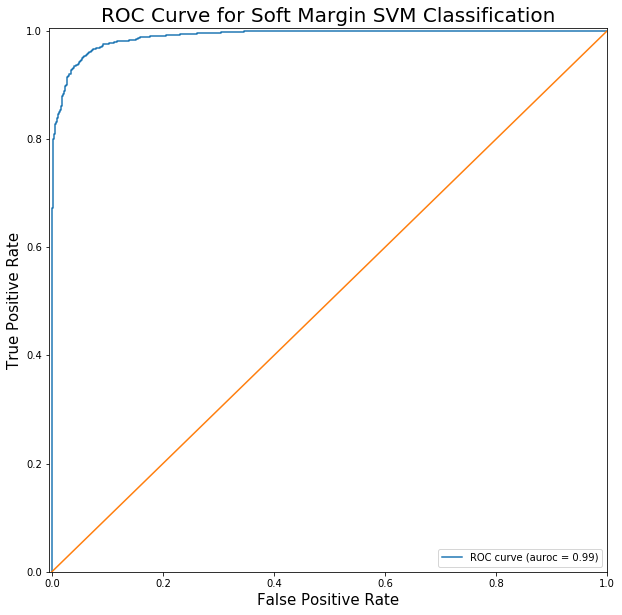

In [13]:
#### Soft Margin SVM ####

soft_classifier = svm.LinearSVC(C=0.001, dual=False, random_state=42)
soft_classifier.fit(reduced_train_tfidf, train_targets)

predicted_soft = soft_classifier.predict(reduced_test_tfidf)

score_soft = soft_classifier.decision_function(reduced_test_tfidf)
accuracy_soft = np.mean(predicted_soft == test_targets)

# output accuracy, confusicon matrix and ROC curve
print "Soft Margin SVM Accuracy: " + str(accuracy_soft)
print "-"*50
print "Classification report: "
print classification_report(test_targets, predicted_soft, target_names=['Computer technology', 'Recreational activity'])
print "-"*50
print "Confusion Matrix: "
print confusion_matrix(test_targets, predicted_soft)
print "-"*50

fpr_soft, tpr_soft, thr_soft = roc_curve(test_targets, score_soft)
auroc_soft = auc(fpr_soft, tpr_soft)
line = [0, 1]
plt.figure(figsize=(10,10))
plt.plot(fpr_soft, tpr_soft,label='ROC curve (auroc = %0.2f)' % auroc_soft)
plt.plot([0,1],[0,1])
plt.axis([-0.005, 1, 0, 1.005])
plt.ylabel('True Positive Rate', fontsize = 15)
plt.xlabel('False Positive Rate', fontsize = 15)
plt.title('ROC Curve for Soft Margin SVM Classification', fontsize = 20)
plt.legend(loc="lower right")
plt.show()

In [14]:
############ Part F ############

from sklearn.model_selection import cross_val_score

gamma_best =0
score_best = 0

for gamma_C in [0.001, 0.01, 0.1, 1, 10, 100, 1000]:
    # train models
    k_classifier = svm.LinearSVC(C = gamma_C, dual=False, random_state=42)
    k_classifier.fit(reduced_train_tfidf, train_targets)       
    score_k = (cross_val_score(k_classifier, reduced_test_tfidf, test_targets, cv=5))
    if score_k.mean() > score_best:
        score_best = score_k.mean()
        gamma_best = gamma_C
   
    print 'Accuracy for', gamma_C,': %0.8f' % (score_k.mean())

print 'Best value for gamma is', gamma_best, 'with accuracy of %0.8f' % score_best

Accuracy for 0.001 : 0.94158730
Accuracy for 0.01 : 0.97047619
Accuracy for 0.1 : 0.97746032
Accuracy for 1 : 0.98444444
Accuracy for 10 : 0.98412698
Accuracy for 100 : 0.98349206
Accuracy for 1000 : 0.98095238
Best value for gamma is 1 with accuracy of 0.98444444


5-Fold Validation of SVC with Gamma = 1 has Accuracy : 0.924126984127
--------------------------------------------------
Classification report: 
                       precision    recall  f1-score   support

  Computer technology       0.92      0.93      0.93      1590
Recreational activity       0.93      0.92      0.92      1560

          avg / total       0.92      0.92      0.92      3150

--------------------------------------------------
Confusion Matrix: 
[[1483  107]
 [ 132 1428]]
--------------------------------------------------


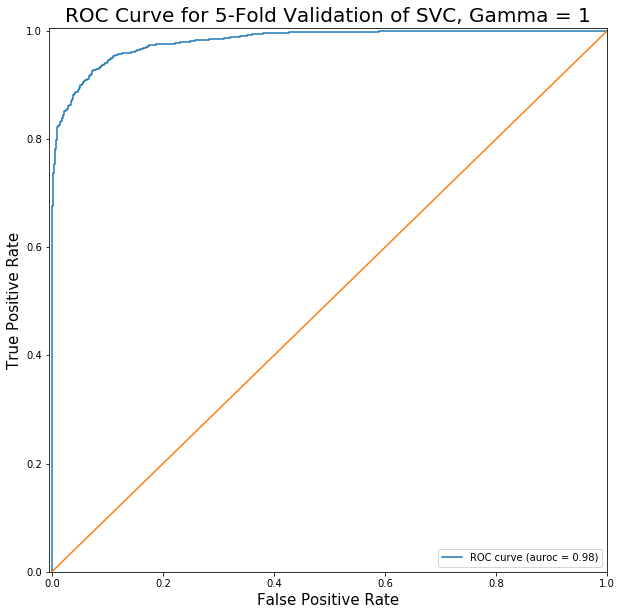

In [15]:
### set gamma C as 1 ###

classifier_5f = svm.LinearSVC(C = gamma_best, dual=False, random_state=42)
classifier_5f.fit(reduced_train_tfidf, train_targets)

predicted_5f = classifier_5f.predict(reduced_test_tfidf)
score_5f = classifier_5f.decision_function(reduced_test_tfidf)
accuracy_5f = np.mean(predicted_5f == test_targets)

# output accuracy, confusicon matrix and ROC curve
print '5-Fold Validation of SVC with Gamma = ' + str(gamma_best) + ' has Accuracy : ' + str(accuracy_5f)
print "-"*50
print "Classification report: "
print classification_report(test_targets, predicted_5f, target_names=['Computer technology', 'Recreational activity'])
print "-"*50
print "Confusion Matrix: "
print confusion_matrix(test_targets, predicted_5f)
print "-"*50

fpr_5f, tpr_5f, thr_5f = roc_curve(test_targets, score_5f)
auroc_5f = auc(fpr_5f, tpr_5f)
line = [0, 1]
plt.figure(figsize=(10,10))
plt.plot(fpr_5f, tpr_5f,label='ROC curve (auroc = %0.2f)' % auroc_5f)
plt.plot([0,1],[0,1])
plt.axis([-0.005, 1, 0, 1.005])
plt.ylabel('True Positive Rate', fontsize = 15)
plt.xlabel('False Positive Rate', fontsize = 15)
plt.title('ROC Curve for 5-Fold Validation of SVC, Gamma = ' + str(gamma_best), fontsize = 20)
plt.legend(loc="lower right")
plt.show()

Naive Bayes SVM Accuracy: 0.83746031746
--------------------------------------------------
Classification report: 
                       precision    recall  f1-score   support

  Computer technology       0.76      1.00      0.86      1590
Recreational activity       1.00      0.67      0.80      1560

          avg / total       0.88      0.84      0.83      3150

--------------------------------------------------
Confusion Matrix: 
[[1588    2]
 [ 510 1050]]
--------------------------------------------------


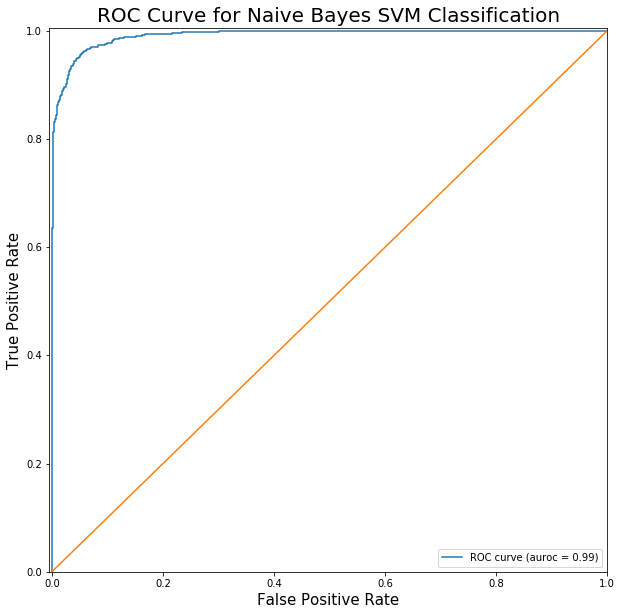

In [16]:
############ Part G ############

from sklearn.naive_bayes import MultinomialNB
# Or since MultinomialNB requires non-neg intputs ==> use GaussianNB instead
from sklearn.naive_bayes import GaussianNB

#normalization to make data non-negtive to be fed into MultinomialNB

a = reduced_train_tfidf
b = reduced_test_tfidf
train_nor = (a-np.nanmin(a))/(np.nanmax(a) - np.nanmin(a))
test_nor = (b-np.nanmin(b))/(np.nanmax(b) - np.nanmin(b))

classifier_nb = MultinomialNB()
classifier_nb.fit(train_nor, train_targets)  
predicted_nb = classifier_nb.predict(test_nor)

score_nb = classifier_nb.predict_proba(test_nor)
accuracy_nb = np.mean(predicted_nb == test_targets)

# output accuracy, confusicon matrix and ROC curve
print "Naive Bayes SVM Accuracy: " + str(accuracy_nb)
print "-"*50
print "Classification report: "
print classification_report(test_targets, predicted_nb, target_names=['Computer technology', 'Recreational activity'])
print "-"*50
print "Confusion Matrix: "
print confusion_matrix(test_targets, predicted_nb)
print "-"*50

fpr_nbg, tpr_nbg, thr_nbg = roc_curve(test_targets, score_nb[:,1])
auroc_nbg = auc(fpr_nbg, tpr_nbg)
line = [0, 1]
plt.figure(figsize=(10,10))
plt.plot(fpr_nbg, tpr_nbg,label='ROC curve (auroc = %0.2f)' % auroc_nbg)
plt.plot([0,1],[0,1])
plt.axis([-0.005, 1, 0, 1.005])
plt.ylabel('True Positive Rate', fontsize = 15)
plt.xlabel('False Positive Rate', fontsize = 15)
plt.title('ROC Curve for Naive Bayes SVM Classification', fontsize = 20)
plt.legend(loc="lower right")
plt.show()

Logistic Regression SVC Accuracy: 0.935238095238
--------------------------------------------------
Classification report: 
                       precision    recall  f1-score   support

  Computer technology       0.92      0.95      0.94      1590
Recreational activity       0.95      0.92      0.93      1560

          avg / total       0.94      0.94      0.94      3150

--------------------------------------------------
Confusion Matrix: 
[[1515   75]
 [ 129 1431]]
--------------------------------------------------


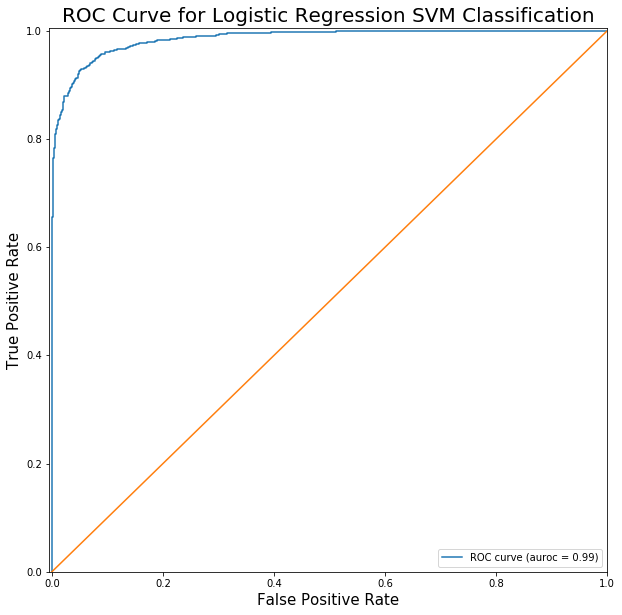

In [17]:
############ Part H ############

from sklearn import linear_model

classifier_log = linear_model.LogisticRegression()
classifier_log.fit(reduced_train_tfidf, train_targets)

predicted_log = classifier_log.predict(reduced_test_tfidf)

score_log = classifier_log.decision_function(reduced_test_tfidf)
accuracy_log = np.mean(predicted_log == test_targets)

# output accuracy, confusicon matrix and ROC curve
print "Logistic Regression SVC Accuracy: " + str(accuracy_log)
print "-"*50
print "Classification report: "
print classification_report(test_targets, predicted_log, target_names=['Computer technology', 'Recreational activity'])
print "-"*50
print "Confusion Matrix: "
print confusion_matrix(test_targets, predicted_log)
print "-"*50

fpr_log, tpr_log, thr_log = roc_curve(test_targets, score_log)
auroc_log = auc(fpr_log, tpr_log)
line = [0, 1]
plt.figure(figsize=(10,10))
plt.plot(fpr_log, tpr_log,label='ROC curve (auroc = %0.2f)' % auroc_log)
plt.plot([0,1],[0,1])
plt.axis([-0.005, 1, 0, 1.005])
plt.ylabel('True Positive Rate', fontsize = 15)
plt.xlabel('False Positive Rate', fontsize = 15)
plt.title('ROC Curve for Logistic Regression SVM Classification', fontsize = 20)
plt.legend(loc="lower right")
plt.show()

L1-Norm Regularized Logistic Regression SVC Accuracy: 0.923174603175
--------------------------------------------------
Classification report: 
                       precision    recall  f1-score   support

  Computer technology       0.91      0.94      0.92      1590
Recreational activity       0.93      0.91      0.92      1560

          avg / total       0.92      0.92      0.92      3150

--------------------------------------------------
Confusion Matrix: 
[[1487  103]
 [ 139 1421]]
--------------------------------------------------


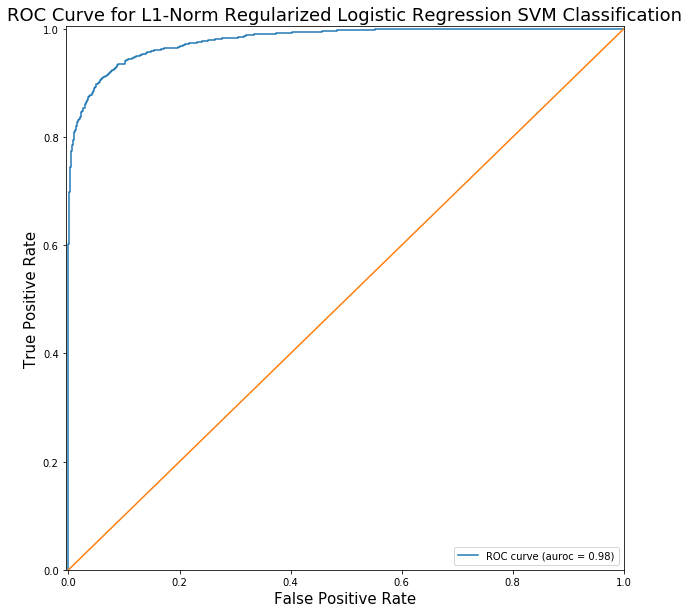

In [18]:
############ Part I ############

# Regularization L1 Norm

classifier_reg1 = linear_model.LogisticRegression(penalty = 'l1')
classifier_reg1.fit(reduced_train_tfidf, train_targets)

predicted_reg1 = classifier_reg1.predict(reduced_test_tfidf)

score_reg1 = classifier_reg1.decision_function(reduced_test_tfidf)
accuracy_reg1 = np.mean(predicted_reg1 == test_targets)

# output accuracy, confusicon matrix and ROC curve
print "L1-Norm Regularized Logistic Regression SVC Accuracy: " + str(accuracy_reg1)
print "-"*50
print "Classification report: "
print classification_report(test_targets, predicted_reg1, target_names=['Computer technology', 'Recreational activity'])
print "-"*50
print "Confusion Matrix: "
print confusion_matrix(test_targets, predicted_reg1)
print "-"*50

fpr_reg1, tpr_reg1, thr_reg1 = roc_curve(test_targets, score_reg1)
auroc_reg1 = auc(fpr_reg1, tpr_reg1)
line = [0, 1]
plt.figure(figsize=(10,10))
plt.plot(fpr_reg1, tpr_reg1,label='ROC curve (auroc = %0.2f)' % auroc_reg1)
plt.plot([0,1],[0,1])
plt.axis([-0.005, 1, 0, 1.005])
plt.ylabel('True Positive Rate', fontsize = 15)
plt.xlabel('False Positive Rate', fontsize = 15)
plt.title('ROC Curve for L1-Norm Regularized Logistic Regression SVM Classification', fontsize = 18)
plt.legend(loc="lower right")
plt.show()

L2-Norm Regularized Logistic Regression SVC Accuracy: 0.935238095238
--------------------------------------------------
Classification report: 
                       precision    recall  f1-score   support

  Computer technology       0.91      0.94      0.92      1590
Recreational activity       0.93      0.91      0.92      1560

          avg / total       0.92      0.92      0.92      3150

--------------------------------------------------
Confusion Matrix: 
[[1515   75]
 [ 129 1431]]
--------------------------------------------------


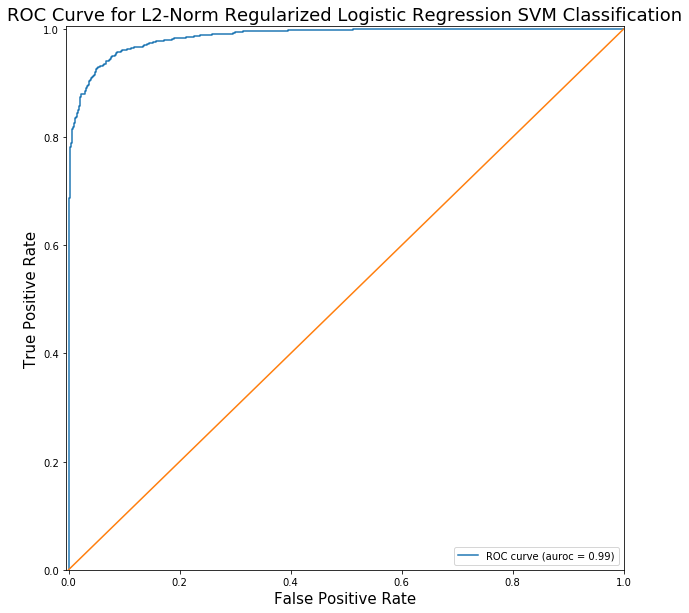

In [19]:
# Regularization L2 Norm

classifier_reg2 = linear_model.LogisticRegression(penalty = 'l2')
classifier_reg2.fit(reduced_train_tfidf, train_targets)

predicted_reg2 = classifier_reg2.predict(reduced_test_tfidf)

score_reg2 = classifier_reg2.decision_function(reduced_test_tfidf)
accuracy_reg2 = np.mean(predicted_reg2 == test_targets)

# output accuracy, confusicon matrix and ROC curve
print "L2-Norm Regularized Logistic Regression SVC Accuracy: " + str(accuracy_reg2)
print "-"*50
print "Classification report: "
print classification_report(test_targets, predicted_reg1, target_names=['Computer technology', 'Recreational activity'])
print "-"*50
print "Confusion Matrix: "
print confusion_matrix(test_targets, predicted_reg2)
print "-"*50

fpr_reg2, tpr_reg2, thr_reg2 = roc_curve(test_targets, score_reg2)
auroc_reg2 = auc(fpr_reg2, tpr_reg2)
line = [0, 1]
plt.figure(figsize=(10,10))
plt.plot(fpr_reg2, tpr_reg2,label='ROC curve (auroc = %0.2f)' % auroc_reg2)
plt.plot([0,1],[0,1])
plt.axis([-0.005, 1, 0, 1.005])
plt.ylabel('True Positive Rate', fontsize = 15)
plt.xlabel('False Positive Rate', fontsize = 15)
plt.title('ROC Curve for L2-Norm Regularized Logistic Regression SVM Classification', fontsize = 18)
plt.legend(loc="lower right")
plt.show()

In [20]:
############ Part J ############

multi_catagories = ['comp.sys.ibm.pc.hardware' , 'comp.sys.mac.hardware', 'misc.forsale','soc.religion.christian']

multi_train = fetch_20newsgroups(subset='train', categories=multi_catagories, shuffle=True,random_state=42)
multi_train_counts = final_count_vectorizer_2.fit_transform(multi_train.data)
multi_train_tfidf = tfidf_transformer_2.fit_transform(multi_train_counts)
multi_train_reduced = SVD.fit_transform(multi_train_tfidf)
a = multi_train_reduced
multi_train_scaled = (a-np.nanmin(a))/(np.nanmax(a) - np.nanmin(a)) #scale data to fit into MultinominalNB

multi_test = fetch_20newsgroups(subset='test', categories=multi_catagories, shuffle=True, random_state=42)
multi_test_counts = final_count_vectorizer_2.transform(multi_test.data)
multi_test_tfidf = tfidf_transformer_2.transform(multi_test_counts)
multi_test_reduced = SVD.transform(multi_test_tfidf)
b = multi_test_reduced
multi_test_scaled = (b-np.nanmin(b))/(np.nanmax(b) - np.nanmin(b)) #scale data to fit into MultinominalNB

In [21]:
#Multiclass Naive Bayes

multi_mnb_clf = MultinomialNB().fit(multi_train_scaled,multi_train.target)
multi_mnb_predicted = multi_mnb_clf.predict(multi_test_scaled)

accuracy_mnb = np.mean(multi_mnb_predicted == multi_test.target)
# output accuracy, confusicon matrix and ROC curve
print "Naive Bayes Multiclass Classification Accuracy: " + str(accuracy_mnb)
print "-"*50
print "Classification report: "
print classification_report(multi_test.target, multi_mnb_predicted, target_names=multi_train.target_names)
print "-"*50
print "Confusion Matrix: "
print confusion_matrix(multi_test.target, multi_mnb_predicted)
print "-"*50

Naive Bayes Multiclass Classification Accuracy: 0.807667731629
--------------------------------------------------
Classification report: 
                          precision    recall  f1-score   support

comp.sys.ibm.pc.hardware       0.64      0.95      0.76       392
   comp.sys.mac.hardware       0.98      0.45      0.62       385
            misc.forsale       0.92      0.82      0.87       390
  soc.religion.christian       0.87      0.99      0.93       398

             avg / total       0.85      0.81      0.80      1565

--------------------------------------------------
Confusion Matrix: 
[[373   0   8  11]
 [159 175  18  33]
 [ 51   3 320  16]
 [  2   0   0 396]]
--------------------------------------------------


In [22]:
#Multiclass One-vs-One
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC

multi_ovo_clf = OneVsOneClassifier(LinearSVC(dual=False, random_state=42)).fit(multi_train_scaled,multi_train.target)
multi_ovo_predicted = multi_ovo_clf.predict(multi_test_scaled)

accuracy_ovo = np.mean(multi_ovo_predicted == multi_test.target)
# output accuracy, confusicon matrix and ROC curve
print "One-vs-One Multiclass Classification Accuracy: " + str(accuracy_ovo)
print "-"*50
print "Classification report: "
print classification_report(multi_test.target, multi_mnb_predicted, target_names=multi_train.target_names)
print "-"*50
print "Confusion Matrix: "
print confusion_matrix(multi_test.target, multi_ovo_predicted)
print "-"*50

One-vs-One Multiclass Classification Accuracy: 0.879233226837
--------------------------------------------------
Classification report: 
                          precision    recall  f1-score   support

comp.sys.ibm.pc.hardware       0.64      0.95      0.76       392
   comp.sys.mac.hardware       0.98      0.45      0.62       385
            misc.forsale       0.92      0.82      0.87       390
  soc.religion.christian       0.87      0.99      0.93       398

             avg / total       0.85      0.81      0.80      1565

--------------------------------------------------
Confusion Matrix: 
[[292  72  28   0]
 [ 14 348  23   0]
 [ 12  20 358   0]
 [  1   6  13 378]]
--------------------------------------------------


In [23]:
#Multiclass One-vs-Rest
from sklearn.multiclass import OneVsRestClassifier
multi_ovr_clf = OneVsRestClassifier(LinearSVC(dual=False, random_state=42)).fit(multi_train_scaled,multi_train.target)
multi_ovr_predicted = multi_ovr_clf.predict(multi_test_scaled)

accuracy_ovr = np.mean(multi_ovr_predicted == multi_test.target)
# output accuracy, confusicon matrix and ROC curve
print "One-vs-Rest Multiclass Classification Accuracy: " + str(accuracy_ovr)
print "-"*50
print "Classification report: "
print classification_report(multi_test.target, multi_mnb_predicted, target_names=multi_train.target_names)
print "-"*50
print "Confusion Matrix: "
print confusion_matrix(multi_test.target, multi_ovr_predicted)
print "-"*50

One-vs-Rest Multiclass Classification Accuracy: 0.861980830671
--------------------------------------------------
Classification report: 
                          precision    recall  f1-score   support

comp.sys.ibm.pc.hardware       0.64      0.95      0.76       392
   comp.sys.mac.hardware       0.98      0.45      0.62       385
            misc.forsale       0.92      0.82      0.87       390
  soc.religion.christian       0.87      0.99      0.93       398

             avg / total       0.85      0.81      0.80      1565

--------------------------------------------------
Confusion Matrix: 
[[260  99  33   0]
 [  9 355  21   0]
 [  8  24 358   0]
 [  0  10  12 376]]
--------------------------------------------------
